# CBE30338 Model Library

In [1]:
%matplotlib inline

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,ode

class GravityTank():
    
    def __init__(self, A=1, Cv=1, h = 0):
        self.A = A
        self.Cv = Cv
        self.Qin = 0
        self._h = h
        self.IC = self._h
        
    def deriv(self,h,t):
        h = max(0,h)
        self._h = h
        return (self.Qin/self.A - self.Cv*np.sqrt(h)/self.A)
    
    @property
    def Qin(self):
        return self._Qin
    
    @Qin.setter
    def Qin(self,Qin):
        self._Qin = Qin
        
    @property
    def Qout(self):
        return self.Cv*np.sqrt(self._h)
        
        

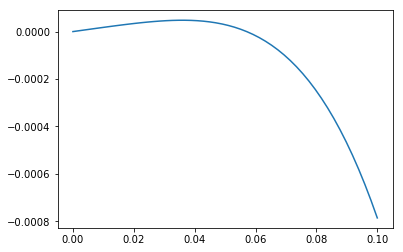

In [186]:
tank1 = GravityTank(2,1)
tank2 = GravityTank(1.5,2)

t = np.linspace(0,.1,50)
tank1.Qin = 3

def deriv(X,t):
    h1,h2 = X
    tank2.Qin = tank1.Qout
    dh1 = tank1.deriv(h1,t)
    dh2 = tank2.deriv(h2,t)
    #print("{0:9.6f}  {1:9.6f}  {2:9.6f}  {3:9.6f}  {4:9.6f}  {5:9.6f}   {6:9.6f}   {7:9.6f}  {8:9.6f}".format(h1,h2,tank1.Qin,tank1.Qout,tank2.Qin,tank2.Qout,dh1,dh2,t))
    return [dh1,dh2]


sol = odeint(deriv,[0,0],t)
h1,h2 = sol.T
plt.plot(t,h2)

/Users/jeff/anaconda/lib/python3.5/site-packages/scipy/integrate/_ode.py:869: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


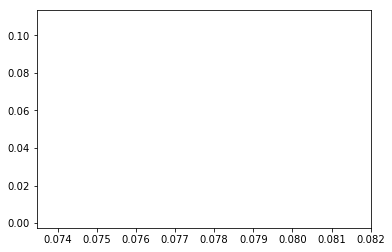

In [165]:
tank1 = GravityTank(2,1)
tank2 = GravityTank(1.5,1)
tank3 = GravityTank(0.8,0.9)

tank1.Qin = 3

def deriv(t,X):
    h1,h2,h3 = X
    tank2.Qin = tank1.Qout
    tank3.Qin = tank2.Qout
    dh1 = tank1.deriv(h1,t)
    dh2 = tank2.deriv(h2,t)
    dh3 = tank3.deriv(h3,t)
    return [dh1,dh2,dh3]


de = ode(deriv)
de.set_initial_value(IC,0)

ts = []
ys = []
t_end = 10
t_step = .2

while de.successful() and de.t < t_end:
    de.integrate(de.t + t_step)
    ts.append(de.t)
    ys.append(de.y)

plt.plot(ts,ys)

[0, 0, 0]
[1.5, 0.0, 0.0]


/Users/jeff/anaconda/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


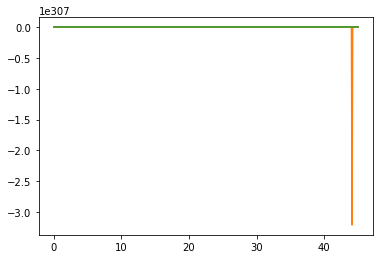

In [107]:
IC = [tank1.IC] + [tank2.IC] + [tank3.IC]
print(IC)
print(deriv(IC,0))
t = np.linspace(0,45,500)
sol = odeint(deriv,IC,t)
plt.plot(t,sol)

In [53]:
tank3.Qin

0.0